<a href="https://colab.research.google.com/github/franciscoerramuspe/pytorch_guide/blob/main/PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) ->
  # Hidden layer1 (number of neurons) ->
  # Hidden layer 2 ->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    #fully connected1
    self.fc1= nn.Linear(in_features, h1) #start with input features then we move to hiden layer 1 (h1)
    self.fc2= nn.Linear(h1, h2) # start with h1 and the move to h2
    self.out = nn.Linear(h2, out_features) # start with h2 and the move to output


  # func to move each layer forward
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectified linear unit: do sth, if the output of that sth is < 0, we would use 0, if > 0, we would use the output
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
# pick a manual seed for randomization
torch.manual_seed(42)
# create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# changing the feature `variety` from string to int
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#Train test split, set x and y, X is feature y is outcome
X = my_df.drop('variety', axis=1)
y = my_df['variety']

X


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# convert to numpy arrays
X = X.values
y = y.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size is 20%, training is %80


In [12]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer and learning rate (if error doesn't go down after a bunch of iterations(epochs, lower our learning rate))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
# train our model
#epochs? (one run trhough all the training data in our network)
epochs=100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted results

  # measure a loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values vs the y_train vals

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some backpropagation
  # take the rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.0846974849700928
Epoch: 10 and loss: 0.9178672432899475
Epoch: 20 and loss: 0.7620365023612976
Epoch: 30 and loss: 0.6275593042373657
Epoch: 40 and loss: 0.46693310141563416
Epoch: 50 and loss: 0.2876907289028168
Epoch: 60 and loss: 0.16747020184993744
Epoch: 70 and loss: 0.10634323954582214
Epoch: 80 and loss: 0.0805111899971962
Epoch: 90 and loss: 0.06965284049510956


Text(0.5, 0, 'Epoch')

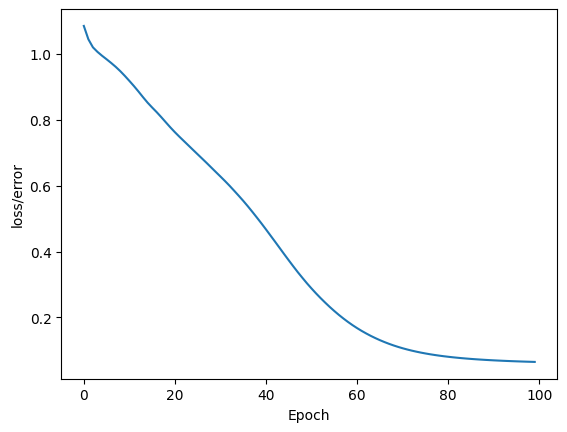

In [17]:
#graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [19]:
# evaluate model on test Data set (validate model on test set)
with torch.no_grad(): #this turns off backpropagation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be prediction
  loss = criterion(y_eval, y_test) # find the loss or error



In [20]:
loss

tensor(0.0638)

In [23]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #will tell us what type of flower our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

  print(f'We got {correct} correct')

    #output is composed by tensors of 3 dimensions. Each dimension is the likelihood of the current flower of being that value
    # Remember, index 0 is Setosa, index 1 is Versicolor, index 2 is Virginica
    # the higher the number the more our model thinks that the flower we are trying to guess is that respective one.
    # in example 1, the greater chance is that it is a Versicolor flower




1.) tensor([-1.4047,  6.3088,  2.6059]) 	 1
2.) tensor([ 8.3873,  2.4565, -7.5105]) 	 0
3.) tensor([-12.1550,   1.2180,  13.7084]) 	 2
4.) tensor([-1.6694,  5.9208,  2.8609]) 	 1
5.) tensor([-1.5830,  6.7488,  2.8363]) 	 1
6.) tensor([ 7.8355,  2.3252, -6.9788]) 	 0
7.) tensor([ 1.1226,  6.0539, -0.0397]) 	 1
8.) tensor([-5.1951,  4.4495,  6.5238]) 	 2
9.) tensor([-3.2498,  4.9141,  4.4721]) 	 1
10.) tensor([0.5643, 6.5383, 0.5529]) 	 1
11.) tensor([-4.3360,  4.7788,  5.6267]) 	 2
12.) tensor([ 7.3510,  2.0547, -6.5259]) 	 0
13.) tensor([ 8.1241,  2.3544, -7.2604]) 	 0
14.) tensor([ 7.4812,  2.1052, -6.6496]) 	 0
15.) tensor([ 7.8507,  2.2484, -7.0006]) 	 0
16.) tensor([-1.3284,  6.5228,  2.5457]) 	 1
17.) tensor([-8.2425,  2.4429,  9.6183]) 	 2
18.) tensor([0.3340, 6.4646, 0.7730]) 	 1
19.) tensor([-1.5835,  5.7637,  2.7534]) 	 1
20.) tensor([-8.1610,  2.2921,  9.5194]) 	 2
21.) tensor([ 7.2355,  2.0783, -6.4101]) 	 0
22.) tensor([-3.9038,  4.6631,  5.1523]) 	 2
23.) tensor([ 7.3376, 